# DSCI 100 - Group Project Report


### Title
**Classification of Work Recruitment using Grades Percentage**

### Introduction
Many students looking to enter the workforce experience anxiety regarding this process, and often resources such as competitive admission averages, and relevant extracurricular courses/degrees are scarce, not publicly accessible, or inaccurate. Our project aims to address this difficulty and provide a more reliable way to reach a concrete answer regarding job placement. Specifically, this project uses the Campus Recruitment dataset, which tracks candidates who apply and attempts to answer the question of whether an applicant will be placed or not based on their grade percentage. Moreover, this project uses a K-NN classification to evaluate the hypothesis that successful placement is more likely when higher grade percentages are achieved across all educational levels. 

### Methods

For this project, we will only use a certain variable for part of the data analysis, specifically the 10th grade percentage `ssc_p`, 12th grade `hsc_p`, degree percentage `degree_p`, test score percentage `etest_p`, mba grade percentage `mba_p`  and placement status `status`. We will not, however, filter the current data considering the row number is suitable for this data analysis which is 215. In the process of the project, we will also step up the total sample for “not placed” in the placement status, which will use the “step_upsample” function from R.

We will use a scatterplot with the test score percentage at the x-axis versus mba grade percentage at the y-axis. Then, we will use the placement status as the color variable for the plot to get a better visualization. Adding layers of visualization with title and labeling will also be done to ensure an effective visualization.

Before using the K-NN classification, we will perform five-fold Cross Validation on the training data,"training_data", to find the optimal number of neighbors (k) in k-nearest neighbors (KNN) algorithm. From the plot of V-fold Cross Validation, we will get the best K value. Then, we will make a new model specification for the best parameter value, and re-train the classifier. Finally, we can evaluate the estimated accuracy of the classifier on the test set and obtain its metrics.

### Results

In [1]:
library(tidyverse)
library(tidymodels)
data <- read_csv("Placement_Data_Full_Class.csv")
data

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NA
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000
6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NA
7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NA
8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000
9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000


In [2]:
tidy_data <- rename(data,
               candidate_id = sl_no,
               gender = gender,
               sec_grade_percent = ssc_p,
               sec_edu_board = ssc_b,
               h_sec_grade_percent = hsc_p,
               h_sec_education_board = hsc_b,
               h_sec_specialization = hsc_s,
               degree_percent = degree_p,
               degree_type = degree_t,
               work_experience = workex,
               e_test_percent = etest_p,
               mba_specialization = specialisation,
               mba_percent = mba_p,
               placement_status = status,
               salary = salary) |>
        select(sec_grade_percent, h_sec_grade_percent, degree_percent, e_test_percent, mba_percent, placement_status) |>
        mutate(placement_status = as.factor(placement_status)) 

tidy_data

sec_grade_percent,h_sec_grade_percent,degree_percent,e_test_percent,mba_percent,placement_status
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
67.00,91.00,58.00,55.00,58.80,Placed
79.33,78.33,77.48,86.50,66.28,Placed
65.00,68.00,64.00,75.00,57.80,Placed
56.00,52.00,52.00,66.00,59.43,Not Placed
85.80,73.60,73.30,96.80,55.50,Placed
55.00,49.80,67.25,55.00,51.58,Not Placed
46.00,49.20,79.00,74.28,53.29,Not Placed
82.00,64.00,66.00,67.00,62.14,Placed
73.00,79.00,72.00,91.34,61.29,Placed


In [3]:
set.seed(2024)
tidy_split <- initial_split(tidy_data, prop = 0.75, strata = placement_status)
training_data <- training(tidy_split)
training_data
testing_data <- testing(tidy_split)

sec_grade_percent,h_sec_grade_percent,degree_percent,e_test_percent,mba_percent,placement_status
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
56.00,52.00,52.00,66.00,59.43,Not Placed
55.00,49.80,67.25,55.00,51.58,Not Placed
46.00,49.20,79.00,74.28,53.29,Not Placed
58.00,70.00,61.00,54.00,52.21,Not Placed
62.00,47.00,50.00,76.00,54.96,Not Placed
55.00,67.00,64.00,60.00,67.28,Not Placed
67.00,53.00,65.00,64.00,58.32,Not Placed
74.00,63.16,65.00,65.00,69.76,Not Placed
76.00,64.00,72.00,58.00,66.53,Not Placed


In [26]:
total <- nrow(training_data)

class_count <- training_data |>
               group_by(placement_status) |>
               summarize(
                   count = n()
               ) |>
               mutate(percent = 100*count/total)
class_count

placement_status,count,percent
<fct>,<int>,<dbl>
Not Placed,50,31.0559
Placed,111,68.9441


In [5]:
average_predictors <- training_data |>
                      group_by(placement_status) |>
                      summarize(across(sec_grade_percent : mba_percent, mean))
# without using the function "na.rm = TRUE", we can see that every columns have no missing values
average_predictors

placement_status,sec_grade_percent,h_sec_grade_percent,degree_percent,e_test_percent,mba_percent
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Not Placed,58.21140,59.24900,61.79180,68.60900,62.17180
Placed,71.20414,69.94748,68.59396,73.03991,62.31811


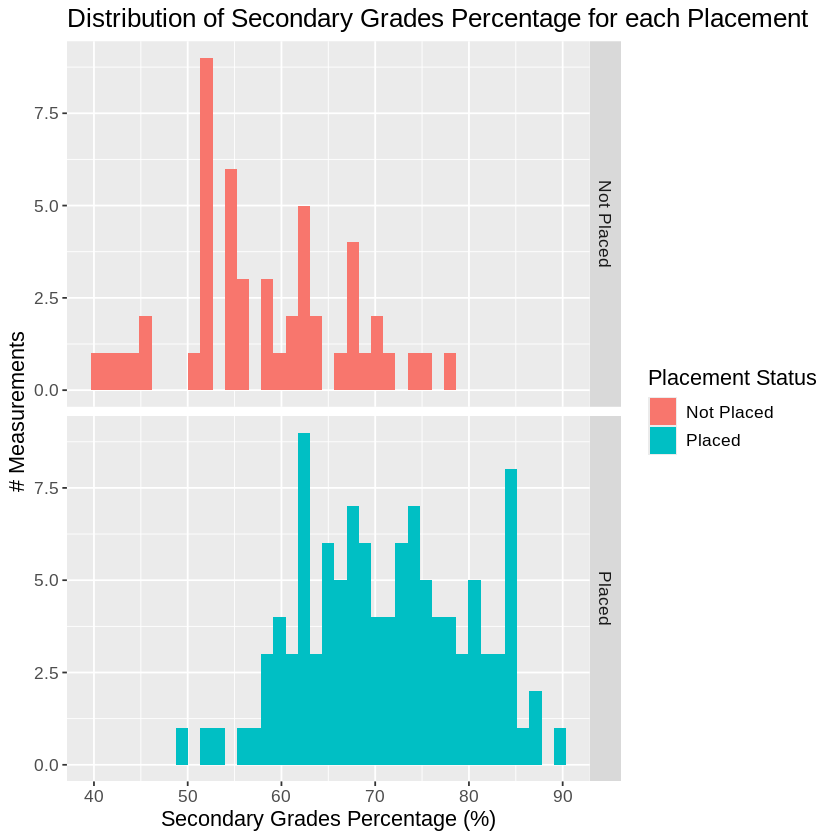

In [6]:
sec_grade_plot <- training_data |>
                   ggplot(aes(x = sec_grade_percent, fill = placement_status)) +
                   geom_histogram(bins = 30, binwidth = 1.3) +
                   facet_grid(rows = vars(placement_status)) +
                   labs(x = "Secondary Grades Percentage (%)",
                   y = "# Measurements",
                   fill = "Placement Status") +
                   theme(text = element_text(size = 13)) +
                   ggtitle("Distribution of Secondary Grades Percentage for each Placement")
sec_grade_plot

Figure 3.1: Distribution of Secondary Grades Percentage for each Placement.

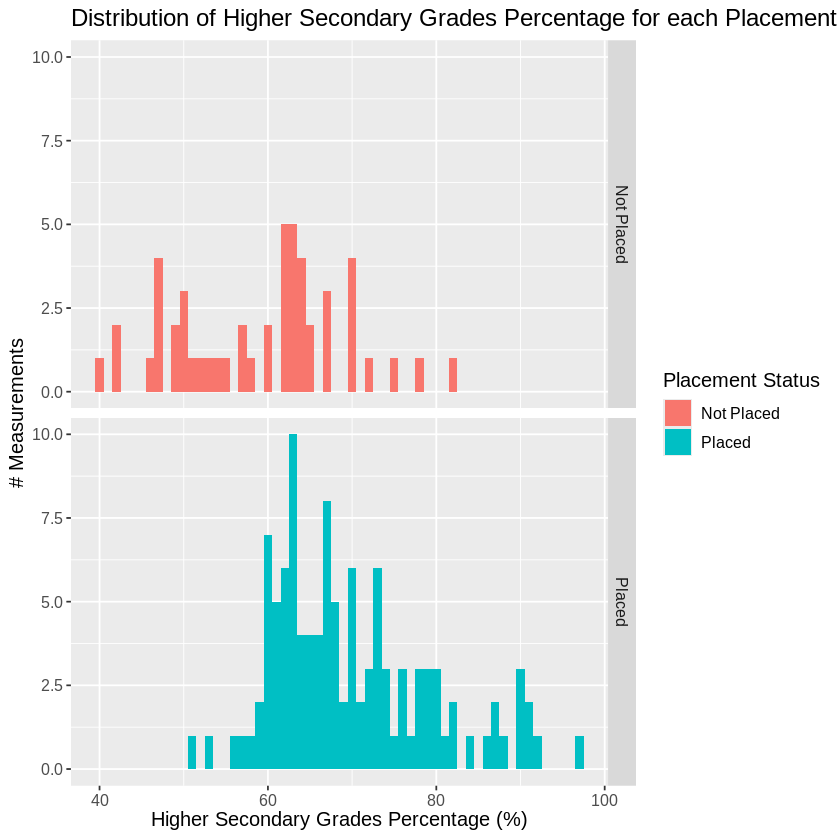

In [7]:
h_sec_plot <- training_data |>
                   ggplot(aes(x = h_sec_grade_percent, fill = placement_status)) +
                   geom_histogram(bins = 30, binwidth = 1) +
                   facet_grid(rows = vars(placement_status)) +
                   labs(x = "Higher Secondary Grades Percentage (%)",
                   y = "# Measurements",
                   fill = "Placement Status") +
                   theme(text = element_text(size = 12)) +
                   ggtitle("Distribution of Higher Secondary Grades Percentage for each Placement")
h_sec_plot

Figure 3.2: Distribution of Higher Secondary Grades Percentage for each Placement.

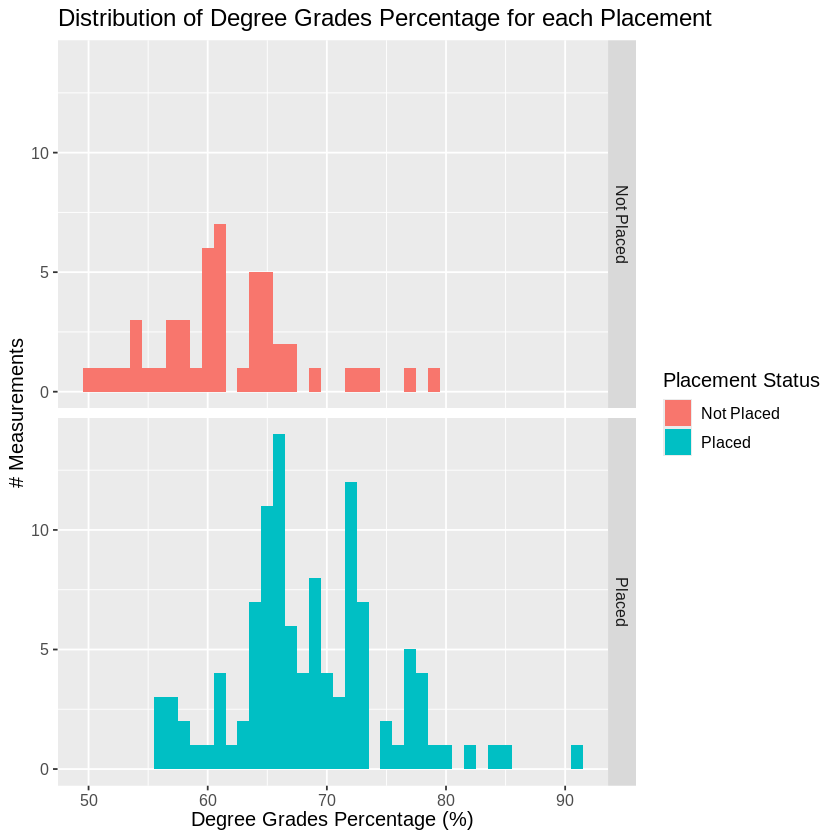

In [8]:
degree_plot <- training_data |>
                   ggplot(aes(x = degree_percent, fill = placement_status)) +
                   geom_histogram(bins = 30, binwidth = 1) +
                   facet_grid(rows = vars(placement_status)) +
                   labs(x = "Degree Grades Percentage (%)",
                   y = "# Measurements",
                   fill = "Placement Status") +
                   theme(text = element_text(size = 12)) +
                   ggtitle("Distribution of Degree Grades Percentage for each Placement")
degree_plot

Figure 3.3: Distribution of Degree Grades Percentage for each Placement.

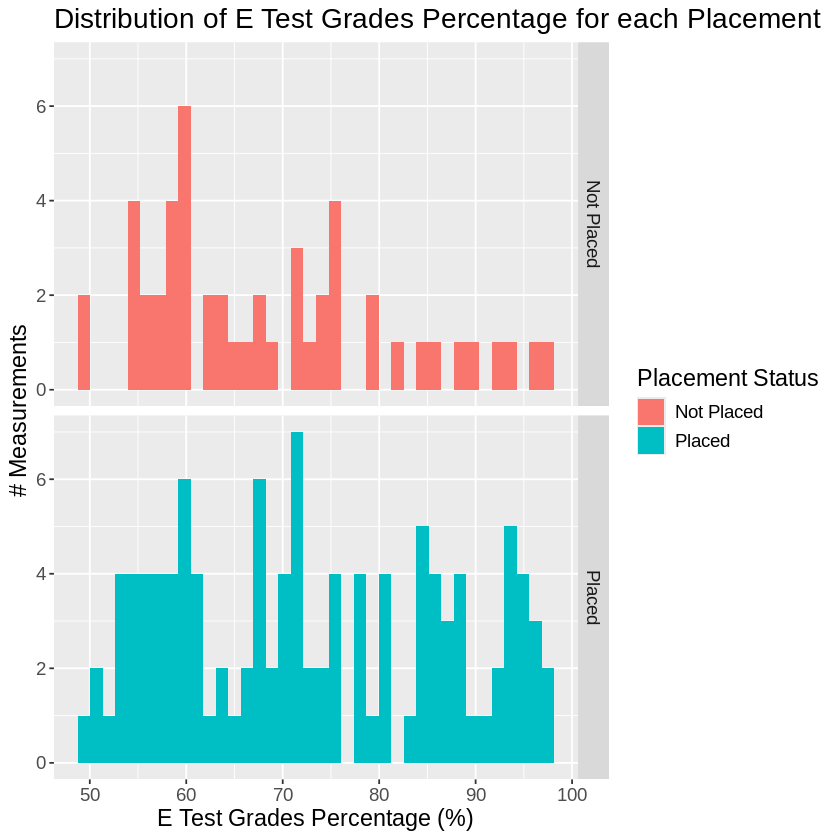

In [9]:
e_test_plot <- training_data |>
                   ggplot(aes(x = e_test_percent, fill = placement_status)) +
                   geom_histogram(bins = 30, binwidth = 1.3) +
                   facet_grid(rows = vars(placement_status)) +
                   labs(x = "E Test Grades Percentage (%)",
                   y = "# Measurements",
                   fill = "Placement Status") +
                   theme(text = element_text(size = 14)) +
                   ggtitle("Distribution of E Test Grades Percentage for each Placement")
e_test_plot

Figure 3.4: Distribution of E Test Grades Percentage for each Placement.

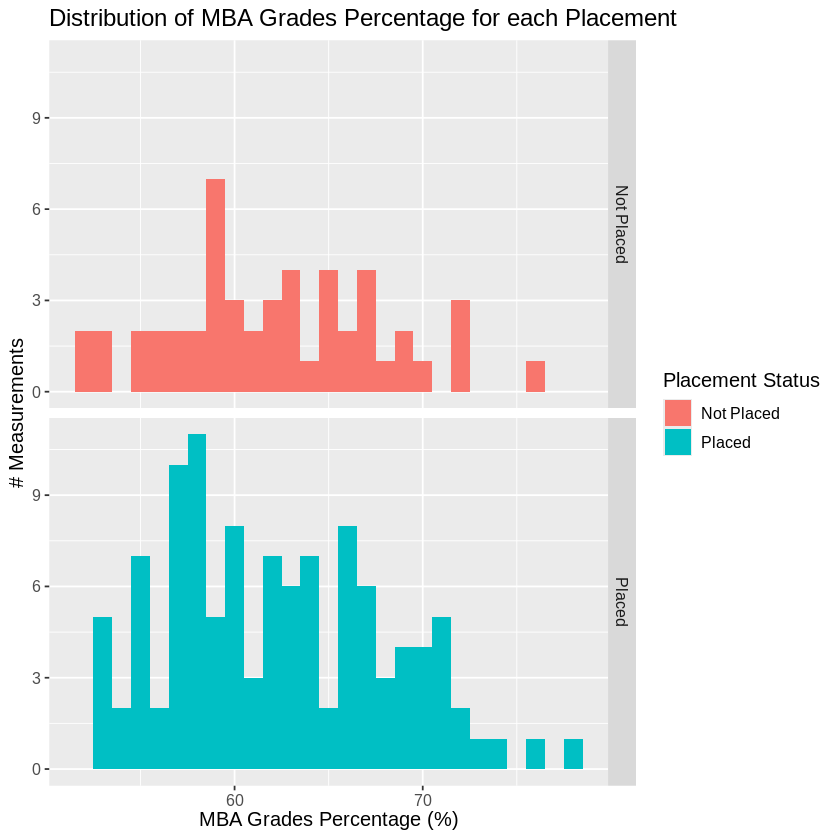

In [10]:
mba_plot <- training_data |>
                   ggplot(aes(x = mba_percent, fill = placement_status)) +
                   geom_histogram(bins = 30, binwidth = 1) +
                   facet_grid(rows = vars(placement_status)) +
                   labs(x = "MBA Grades Percentage (%)",
                   y = "# Measurements",
                   fill = "Placement Status") +
                   theme(text = element_text(size = 12)) +
                   ggtitle("Distribution of MBA Grades Percentage for each Placement")
mba_plot

Figure 3.5: Distribution of MBA Grades Percentage for each Placement.

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.7517045,5,0.008598151,Preprocessor1_Model01
2,accuracy,binary,0.7517045,5,0.008598151,Preprocessor1_Model02
3,accuracy,binary,0.8075758,5,0.014817580,Preprocessor1_Model03
4,accuracy,binary,0.8075758,5,0.014817580,Preprocessor1_Model04
5,accuracy,binary,0.8011364,5,0.016195674,Preprocessor1_Model05
6,accuracy,binary,0.8011364,5,0.016195674,Preprocessor1_Model06
7,accuracy,binary,0.8077652,5,0.019732449,Preprocessor1_Model07
8,accuracy,binary,0.8077652,5,0.019732449,Preprocessor1_Model08
9,accuracy,binary,0.8265152,5,0.028023584,Preprocessor1_Model09


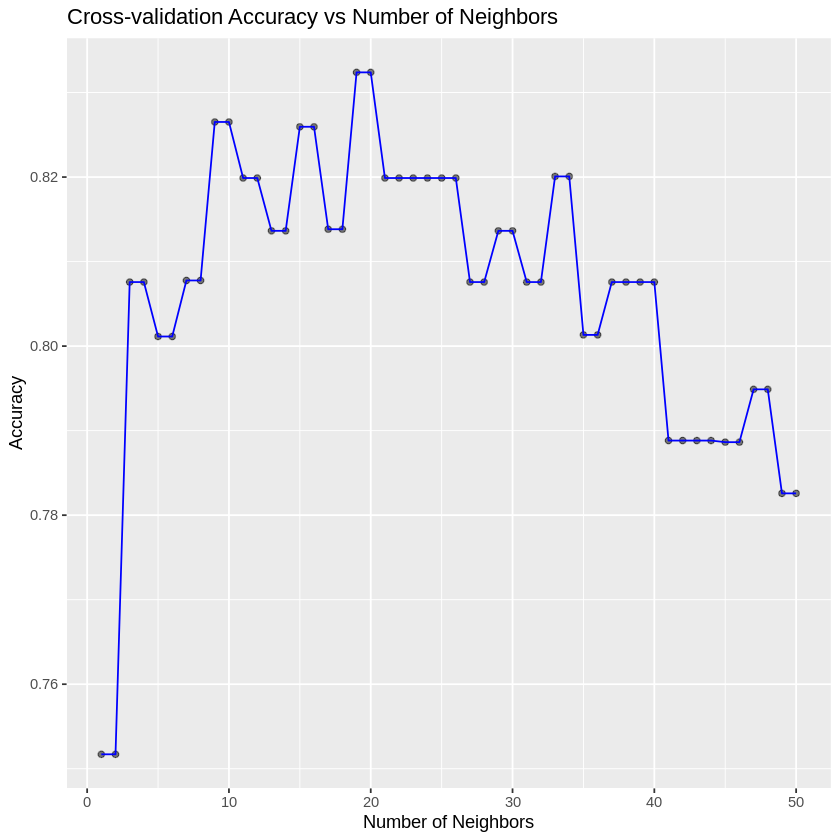

In [11]:
recipe <- recipe(placement_status ~ ., data = training_data) |>
                step_scale(all_predictors()) |>
                step_center(all_predictors())

v_fold <- vfold_cv(training_data, v = 5, strata = placement_status)

knn_spec <- knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

k_values <- tibble(neighbors = seq(from = 1, to = 50, by = 1))

workflow <- workflow() |>
            add_recipe(recipe) |>
            add_model(knn_spec) |>
            tune_grid(resamples = v_fold, grid = k_values) |>
            collect_metrics() |>
            filter(.metric == "accuracy")
workflow

cross_val_plot <- workflow |>
                  ggplot(aes(x = neighbors, y = mean)) +
                  geom_point(alpha = 0.5) +
                  geom_line(color = "blue") +
                  labs(x = "Number of Neighbors", y = "Accuracy") +
                  ggtitle("Cross-validation Accuracy vs Number of Neighbors")
cross_val_plot

Figure 3.5: Cross-validation Accuracy vs Number of Neighbors from 1-50.

In [12]:
# minimize range of k
best_k <- workflow |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)
best_k

[1] 19

From this plot and code, we have two K-values that have the highest accuracy for predicting the most effective classification. However, we will choose the K-value to be 19 because we are trying to avoid issues such as having equal classified predictions of a new observation.

In [13]:
minim_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 9) |>
              set_engine("kknn") |>
              set_mode("classification")

minim_fit <- workflow() |>
             add_recipe(recipe) |>
             add_model(minim_spec) |>
             fit(data = training_data)

minim_predictions <- minim_fit |>
                     predict(testing_data) |>
                     bind_cols(testing_data)

minim_metrics <- minim_predictions |>
                 metrics(truth = placement_status, estimate = .pred_class) |>
                 filter(.metric == "accuracy")
minim_metrics

minim_conf_mat <- minim_predictions |>
                  conf_mat(truth = placement_status, estimate = .pred_class) 
minim_conf_mat

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8888889


            Truth
Prediction   Not Placed Placed
  Not Placed         12      1
  Placed              5     36

In [14]:
minim_prec <- minim_predictions |>
              precision(truth = placement_status, estimate = .pred_class, event_level = "second") 
minim_prec

minim_recall <- minim_predictions |>
                recall(truth = placement_status, estimate = .pred_class, event_level = "second")
minim_recall

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.8780488


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.972973


# Discussion



### 1. Summarize your findings.
We can see that generally for secondary, higher secondary, and degree grade percentages, a lower grade percentage results in a lower likelihood of job placement. That is for no placement, it shows a right-skewed distribution for these parameters while placement had a left-skewed distribution for the same parameters. In contrast, the percentage of e-test grades resembles a different distribution across both placement and no-placement groups. In this parameter, placement resembles a roughly continuous distribution indicating that for every e-test grade, roughly the same number of people were able to secure placement. For no placement, this again shows a right-skewed distribution demonstrating that lower e-test grades appear more for the no placement. Lastly, for MBA grade percentages, both the placement and the no-placement groups showed a right-skewed distribution however this distribution was more prominent in the placement group.

### 2. Discuss whether this is what you expected to find.
We believe that these findings align well with the hypotheses that we had before conducting our investigation. Specifically, we think the findings generally agree with our hypothesis that successful placement has a better likelihood when higher grade percentages are achieved across all levels of education. Moreover, we expected that even if the e-test percentage distribution is more variable, we denoted that this grade percentage is reflective of a single assessment so it would likely not show a skewed distribution for overall placement. Simply, we reasoned that a single measure of a given assessment is not as indicative of placement status in comparison to an overall grade percentage. Additionally, given the increased rigour of a graduate program, we also anticipated that the MBA grade percentage distributions for placement status would differ given the difficulty of the program.

### 3. Discuss what impact could such findings have.
Our findings can positively impact relevant demographics by providing a coherent way to provide relevant feedback for future applicants to tune their applications to be more competitive. Specifically, these findings can be used as a resource to provide peace of mind to any individuals hoping to enter the workforce, as they are able to more accurately gauge where they fall in comparison to their competitors. Furthermore, institutions can use the data to improve the resources and opportunities for students to succeed, like changing curriculum at specific levels of education to better prepare students. For example, career counselors and advisors can utilize these findings to provide more tailored guidance to students and job seekers. By understanding the competitive landscape and industry trends, counselors can offer targeted advice on career pathways and skill development.

### 4. Discuss what future questions could this lead to.
Our findings can serve as a foundational framework for addressing many future inquiries about education, work experience, and career outcomes. For instance, they can provide valuable insights into whether employers exhibit a preference for new graduate students with prior work placement experience, thereby informing hiring practices and guiding students in their career preparation efforts. Simply, this can help to answer other questions in the future such as “do employers have a preference for new graduate students that have previous work placement?” Moreover, the findings can facilitate a deeper exploration of work placement as an independent variable, allowing researchers to investigate specific questions such as how GPA requirements for placements vary across different industries. Additionally, by considering work experience alongside academic achievements, researchers can reevaluate conventional expectations and decision-making criteria, ultimately leading to a more holistic understanding of skillset and career success prediction. 


### References




Campus Recruitment. (2020, April 11). Kaggle. https://www.kaggle.com/datasets/benroshan/factors-affecting-campus-placement/data